# FOREX TRADING ARCHITECTURE
1) Develop a strategy to get signals

2) Backtesting of strategy

3) System to place/execute trades

4) Incorporate risk management techniques

5) Portfolio management

##  A simple forex trading strategy(moving averages and RSI)

creating a simple moving average strategy using OANDA

The strategy entails the following:
1. A 50 moving average and a 200 moving average would be chosen. Values would be optimized later on

2. A rsi indicator would be used to filter moving average crossover signals.

3. Long Entry signal would be generated when 50 mva crossess 200 from down to up and also RSI is under 30

4. Short entry signal would be generated when 50 mvs crossess 200 from up to down and also RSI is over 40

5. Exit trades would happen when:

    stoploss = price goes against us by a*ATR

    take_profit = price goes in our favour by b*ATR

6. For Risk Management (That is, position sizing and accounting for leverage and all using 1000 dollars as my start capital)

    1. We would be risking 10 dollars per trade (about 1 percent)
    2. Calculate position sizing
    3. Adjust for account leverage
    4. Refine based on trading conditions
7. Backtesting and evaluation

The yt link below consist of algo_trading with forex

"https://www.youtube.com/watch?v=B8r_o6FYLzI&list=PLZ1QII7yudbecO6a-zAI6cuGP1LLnmW8e&index=2"

**Importing and installing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=a47351b5d915cadf7692c648feec1c4e4692732afe0776943a19a0a6890a07aa
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


**Dataset Acquisition**

EURUSD dataset for different time intervals can be acquired from the link below:
"https://forexsb.com/historical-forex-data"

In [3]:
#1 hour time interval

url = "https://raw.githubusercontent.com/Ghaby-X/Algo_forex/main/EURUSD_H1.csv"
col_names = ["Open",	"High",	"Low",	"Close",	"Volume"]
df = pd.read_csv(url,names = col_names,index_col=0, parse_dates=True)

In [4]:
#Note: this is a 1hour time interval

start_date = '2022-01-01'
end_date = '2023-01-05'
df = df[start_date:end_date]
df

,Open,High,Low,Close,Volume
2022-01-02 22:00:00,1.13690,1.13741,1.13649,1.13729,1111
2022-01-02 23:00:00,1.13721,1.13782,1.13692,1.13727,1706
2022-01-03 00:00:00,1.13726,1.13755,1.13608,1.13618,1112
2022-01-03 01:00:00,1.13619,1.13651,1.13498,1.13584,1630
2022-01-03 02:00:00,1.13584,1.13585,1.13423,1.13425,1276
...,...,...,...,...,...
2023-01-05 19:00:00,1.05359,1.05385,1.05289,1.05300,13555
2023-01-05 20:00:00,1.05299,1.05306,1.05198,1.05199,15750
2023-01-05 21:00:00,1.05197,1.05227,1.05155,1.05202,3610
2023-01-05 22:00:00,1.05195,1.05225,1.05195,1.05208,4015


**Moving Averages**

In [5]:
low_MA = 50
high_MA = 200

df["low_MA"] = df["Close"].rolling(low_MA).mean()
df["high_MA"] = df["Close"].rolling(high_MA).mean()
df

<ipython-input-5-1866fb2ca2bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["low_MA"] = df["Close"].rolling(low_MA).mean()
<ipython-input-5-1866fb2ca2bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["high_MA"] = df["Close"].rolling(high_MA).mean()


,Open,High,Low,Close,Volume,low_MA,high_MA
2022-01-02 22:00:00,1.13690,1.13741,1.13649,1.13729,1111,NaN,NaN
2022-01-02 23:00:00,1.13721,1.13782,1.13692,1.13727,1706,NaN,NaN
2022-01-03 00:00:00,1.13726,1.13755,1.13608,1.13618,1112,NaN,NaN
2022-01-03 01:00:00,1.13619,1.13651,1.13498,1.13584,1630,NaN,NaN
2022-01-03 02:00:00,1.13584,1.13585,1.13423,1.13425,1276,NaN,NaN
...,...,...,...,...,...,...,...
2023-01-05 19:00:00,1.05359,1.05385,1.05289,1.05300,13555,1.058624,1.063161
2023-01-05 20:00:00,1.05299,1.05306,1.05198,1.05199,15750,1.058551,1.063110
2023-01-05 21:00:00,1.05197,1.05227,1.05155,1.05202,3610,1.058459,1.063057
2023-01-05 22:00:00,1.05195,1.05225,1.05195,1.05208,4015,1.058398,1.063006


**RSI**

In [6]:
#Adding the rsi filter

import pandas_ta as ta

# Calculate the RSI using pandas_ta
rsi_period = 14  # RSI period
df['RSI'] = ta.rsi(df['Close'], length=rsi_period)
df

,Open,High,Low,Close,Volume,low_MA,high_MA,RSI
2022-01-02 22:00:00,1.13690,1.13741,1.13649,1.13729,1111,NaN,NaN,NaN
2022-01-02 23:00:00,1.13721,1.13782,1.13692,1.13727,1706,NaN,NaN,NaN
2022-01-03 00:00:00,1.13726,1.13755,1.13608,1.13618,1112,NaN,NaN,NaN
2022-01-03 01:00:00,1.13619,1.13651,1.13498,1.13584,1630,NaN,NaN,NaN
2022-01-03 02:00:00,1.13584,1.13585,1.13423,1.13425,1276,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-01-05 19:00:00,1.05359,1.05385,1.05289,1.05300,13555,1.058624,1.063161,32.407934
2023-01-05 20:00:00,1.05299,1.05306,1.05198,1.05199,15750,1.058551,1.063110,30.112245
2023-01-05 21:00:00,1.05197,1.05227,1.05155,1.05202,3610,1.058459,1.063057,30.270247
2023-01-05 22:00:00,1.05195,1.05225,1.05195,1.05208,4015,1.058398,1.063006,30.608146


In [7]:
df.dropna(inplace = True)
df

,Open,High,Low,Close,Volume,low_MA,high_MA,RSI
2022-01-13 05:00:00,1.14421,1.14461,1.14406,1.14410,946,1.138281,1.133224,70.062963
2022-01-13 06:00:00,1.14411,1.14428,1.14383,1.14385,1332,1.138477,1.133257,67.341356
2022-01-13 07:00:00,1.14385,1.14663,1.14384,1.14646,4340,1.138729,1.133303,77.268912
2022-01-13 08:00:00,1.14647,1.14782,1.14622,1.14661,5082,1.138989,1.133355,77.688675
2022-01-13 09:00:00,1.14663,1.14748,1.14584,1.14712,4888,1.139248,1.133411,79.101729
...,...,...,...,...,...,...,...,...
2023-01-05 19:00:00,1.05359,1.05385,1.05289,1.05300,13555,1.058624,1.063161,32.407934
2023-01-05 20:00:00,1.05299,1.05306,1.05198,1.05199,15750,1.058551,1.063110,30.112245
2023-01-05 21:00:00,1.05197,1.05227,1.05155,1.05202,3610,1.058459,1.063057,30.270247
2023-01-05 22:00:00,1.05195,1.05225,1.05195,1.05208,4015,1.058398,1.063006,30.608146


**Visualizing the data**

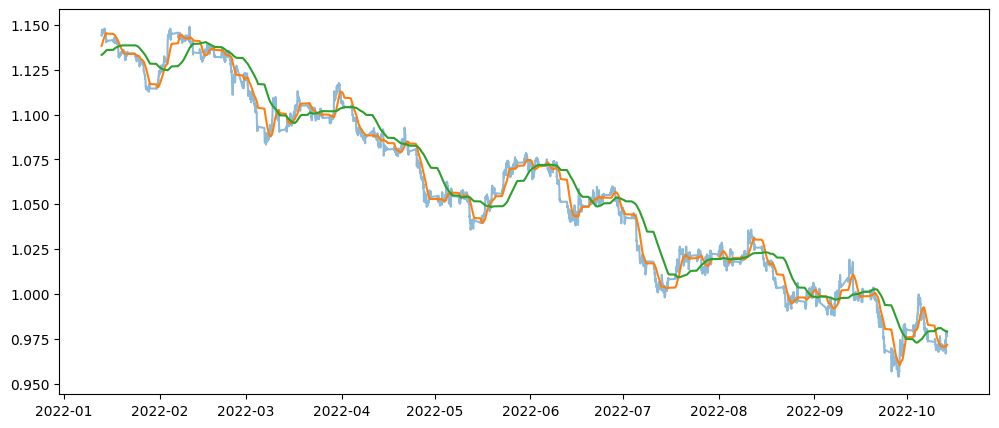

In [9]:
#Visualizing a smaller portion of the Dataset (10 months, i.e., from January 13 to October 13)
start_date = '2022-01-13'
end_date = '2022-10-13'
visual = df[start_date:end_date].copy()

plt.figure(figsize = (12,5))
plt.plot(visual["Close"], label = "Close price", alpha = 0.5)
plt.plot(visual["low_MA"], label = "MA50")
plt.plot(visual["high_MA"], label = "MA200")

In [10]:
df.dropna(inplace = True)
len(df)

6137

In [12]:
df

,Open,High,Low,Close,Volume,low_MA,high_MA,RSI
2022-01-13 05:00:00,1.14421,1.14461,1.14406,1.14410,946,1.138281,1.133224,70.062963
2022-01-13 06:00:00,1.14411,1.14428,1.14383,1.14385,1332,1.138477,1.133257,67.341356
2022-01-13 07:00:00,1.14385,1.14663,1.14384,1.14646,4340,1.138729,1.133303,77.268912
2022-01-13 08:00:00,1.14647,1.14782,1.14622,1.14661,5082,1.138989,1.133355,77.688675
2022-01-13 09:00:00,1.14663,1.14748,1.14584,1.14712,4888,1.139248,1.133411,79.101729
...,...,...,...,...,...,...,...,...
2023-01-05 19:00:00,1.05359,1.05385,1.05289,1.05300,13555,1.058624,1.063161,32.407934
2023-01-05 20:00:00,1.05299,1.05306,1.05198,1.05199,15750,1.058551,1.063110,30.112245
2023-01-05 21:00:00,1.05197,1.05227,1.05155,1.05202,3610,1.058459,1.063057,30.270247
2023-01-05 22:00:00,1.05195,1.05225,1.05195,1.05208,4015,1.058398,1.063006,30.608146


In [16]:
def gen_signal(df):
  if (df['low_MA'] > df['high_MA']) & (df['RSI'] < 30):
    return 1
  elif ((df['low_MA'] < df['high_MA']) & (df['RSI'] > 70)).astype(int):
    return 2
  else:
    return 0

df["signal"] = df.apply(gen_signal, axis = 1)
df

In [18]:
df["signal"].unique()

array([0, 1, 2])

In [25]:
buy_sig = df[df["signal"]==1].count()[0]
sell_sig = df[df["signal"]==2].count()[0]
no_sig = df[df["signal"]==0].count()[0]

In [28]:
print(f"number of buy siganals: {buy_sig}")
print(f"number of sell siganals: {sell_sig}")
print(f"number of no siganals: {no_sig}")

number of buy siganals: 127
number of sell siganals: 134
number of no siganals: 5876


#Backtesting of strategy


In [30]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173804 sha256=cf3d0bb144057b24beb7f933b68624dc1fdbda313cdf1816c26a253d070bce2e
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


instance of backtesting:  https://youtu.be/vPBwO6Fa6rc

In [32]:
def SIGNAL():
  return df.signal

In [33]:
from backtesting import Strategy

class MyCandlesStrat(Strategy):
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        if self.signal1==2:
            sl1 = self.data.Close[-1] - 750e-4
            tp1 = self.data.Close[-1] + 600e-4
            self.buy(sl=sl1, tp=tp1)
        elif self.signal1==1:
            sl1 = self.data.Close[-1] + 750e-4
            tp1 = self.data.Close[-1] - 600e-4
            self.sell(sl=sl1, tp=tp1)

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [34]:
from backtesting import Backtest

bt = Backtest(df, MyCandlesStrat, cash=10_000, commission=.002)
stat = bt.run()
stat


Start                     2022-01-13 05:00:00
End                       2023-01-05 23:00:00
Duration                    357 days 18:00:00
Exposure Time [%]                   93.482157
Equity Final [$]                  9133.493698
Equity Peak [$]                  10349.775389
Return [%]                          -8.665063
Buy & Hold Return [%]               -8.043003
Return (Ann.) [%]                   -7.169872
Volatility (Ann.) [%]                8.417907
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -19.406913
Avg. Drawdown [%]                   -1.131096
Max. Drawdown Duration      329 days 07:00:00
Avg. Drawdown Duration       16 days 22:00:00
# Trades                                   15
Win Rate [%]                        73.333333
Best Trade [%]                       5.788343
Worst Trade [%]                     -7.252254
Avg. Trade [%]                    